In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [77]:
df = pd.read_csv("Iris.csv")

In [78]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [80]:
df.index = df.iloc[:,0]

In [81]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,,
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa
7,7,4.6,3.4,1.4,0.3,Iris-setosa
8,8,5.0,3.4,1.5,0.2,Iris-setosa
9,9,4.4,2.9,1.4,0.2,Iris-setosa


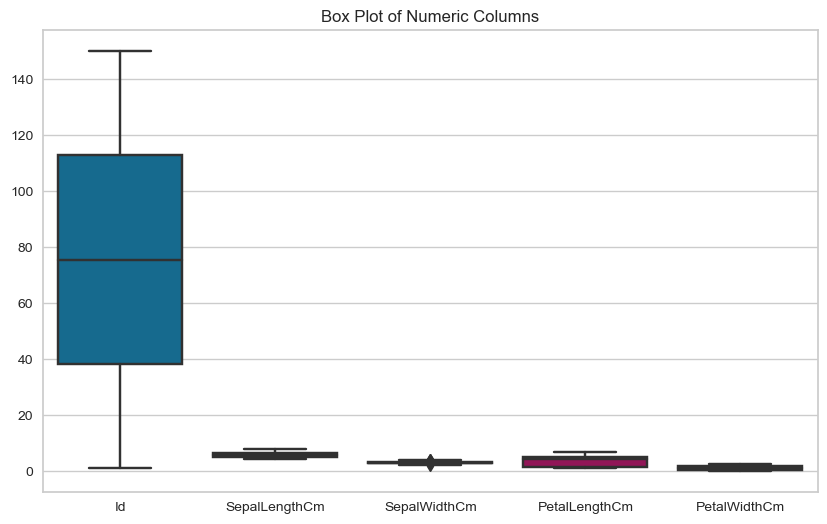

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Numeric Columns')
plt.show()


In [84]:
def outlier_detection(col):
    Q1, Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    upper_bound = Q3 + (1.5 * IQR)
    lower_bound = Q1 - (1.5 * IQR)
    return upper_bound, lower_bound

numeric_columns = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
for col in numeric_columns:
    upper_bound, lower_bound = outlier_detection(df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])


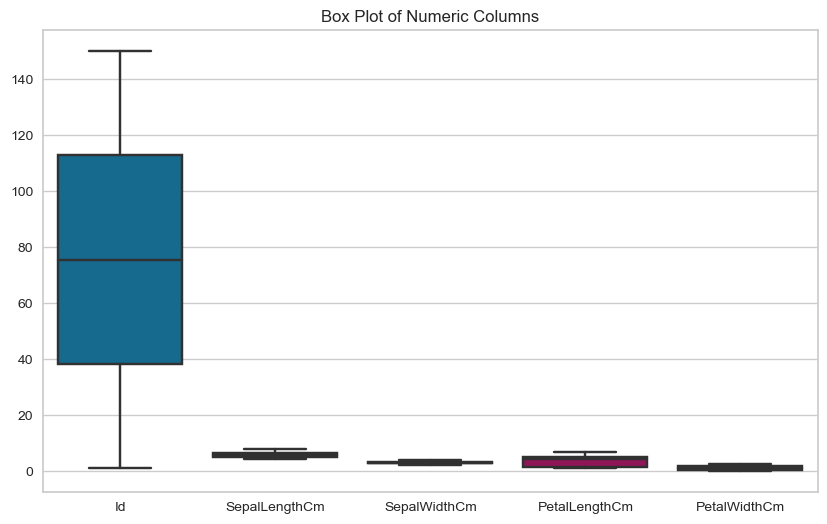

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Numeric Columns')
plt.show()

In [86]:
df.duplicated().sum()

0

In [88]:
df = df.drop_duplicates()

In [89]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      21
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [90]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [91]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [92]:
df = pd.DataFrame(df)

In [93]:
encoded_species = pd.get_dummies(df['Species'], prefix='Species')

In [94]:
df_encoded = pd.concat([df, encoded_species], axis=1)
df_encoded.drop('Species', axis=1, inplace=True)

In [95]:
df = df_encoded

In [96]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
Id,,,,,,,,
1,1,5.1,3.5,1.4,0.2,1,0,0
2,2,4.9,3.0,1.4,0.2,1,0,0
3,3,4.7,3.2,1.3,0.2,1,0,0
4,4,4.6,3.1,1.5,0.2,1,0,0
5,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
146,146,6.7,3.0,5.2,2.3,0,0,1
147,147,6.3,2.5,5.0,1.9,0,0,1
148,148,6.5,3.0,5.2,2.0,0,0,1


In [36]:
from sklearn.preprocessing import RobustScaler

In [39]:
df = pd.DataFrame(df)

In [40]:
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df)

In [97]:
df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']] = scaler.fit_transform(df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']])

In [98]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
Id,,,,,,,,
1,1,-0.538462,1.0,-0.842857,-0.733333,1,0,0
2,2,-0.692308,0.0,-0.842857,-0.733333,1,0,0
3,3,-0.846154,0.4,-0.871429,-0.733333,1,0,0
4,4,-0.923077,0.2,-0.814286,-0.733333,1,0,0
5,5,-0.615385,1.2,-0.842857,-0.733333,1,0,0


In [99]:
df.drop('Id',axis=1,inplace=True)

In [102]:
df.index.name=None
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
1,-0.538462,1.0,-0.842857,-0.733333,1,0,0
2,-0.692308,0.0,-0.842857,-0.733333,1,0,0
3,-0.846154,0.4,-0.871429,-0.733333,1,0,0
4,-0.923077,0.2,-0.814286,-0.733333,1,0,0
5,-0.615385,1.2,-0.842857,-0.733333,1,0,0
...,...,...,...,...,...,...,...
146,0.692308,0.0,0.242857,0.666667,0,0,1
147,0.384615,-1.0,0.185714,0.400000,0,0,1
148,0.538462,0.0,0.242857,0.466667,0,0,1
149,0.307692,0.8,0.300000,0.666667,0,0,1


In [103]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [104]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [105]:
k_fit = kmeans.fit(df)

In [106]:
k_fit.cluster_centers_

array([[-2.07357860e-01, -1.11739130e+00, -1.36024845e-01,
        -8.40579710e-02,  4.34782609e-02,  8.69565217e-01,
         8.69565217e-02],
       [ 2.82051282e-01, -4.00000000e-02,  4.00000000e-02,
         8.44444444e-02,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [-6.02825746e-01,  8.59183673e-01, -8.23615160e-01,
        -7.04761905e-01,  1.00000000e+00, -1.66533454e-16,
        -1.66533454e-16],
       [ 6.42628205e-01, -1.38777878e-16,  3.52976190e-01,
         4.95833333e-01, -2.22044605e-16, -2.22044605e-16,
         1.00000000e+00]])

In [107]:
k_fit.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [108]:
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)

In [109]:
clusters = k_fit.labels_

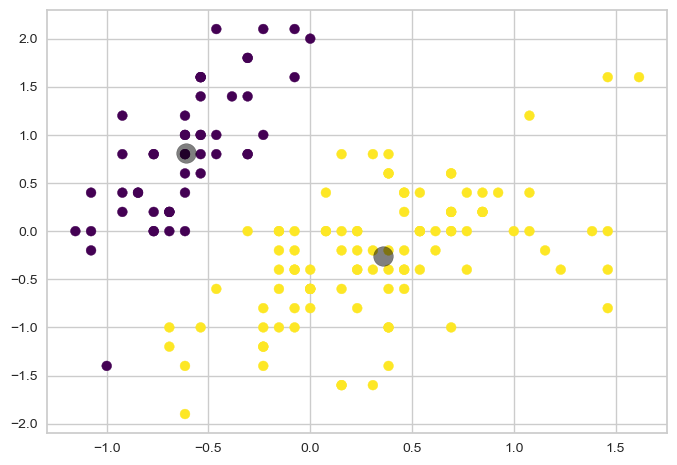

In [110]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1],c = "black", s = 200, alpha = 0.5);

In [111]:
from mpl_toolkits.mplot3d import Axes3D

In [112]:
merkezler

array([[-6.10769231e-01,  8.14000000e-01, -8.24571429e-01,
        -7.04000000e-01,  1.00000000e+00, -1.66533454e-16,
        -1.66533454e-16],
       [ 3.55384615e-01, -2.55000000e-01,  1.58857143e-01,
         2.50666667e-01,  3.88578059e-16,  5.00000000e-01,
         5.00000000e-01]])

In [113]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

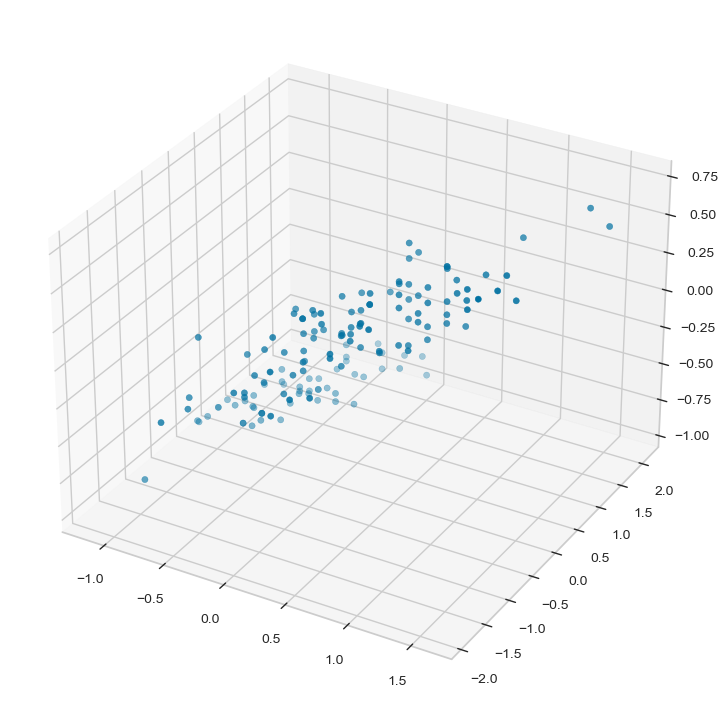

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2])
plt.show()

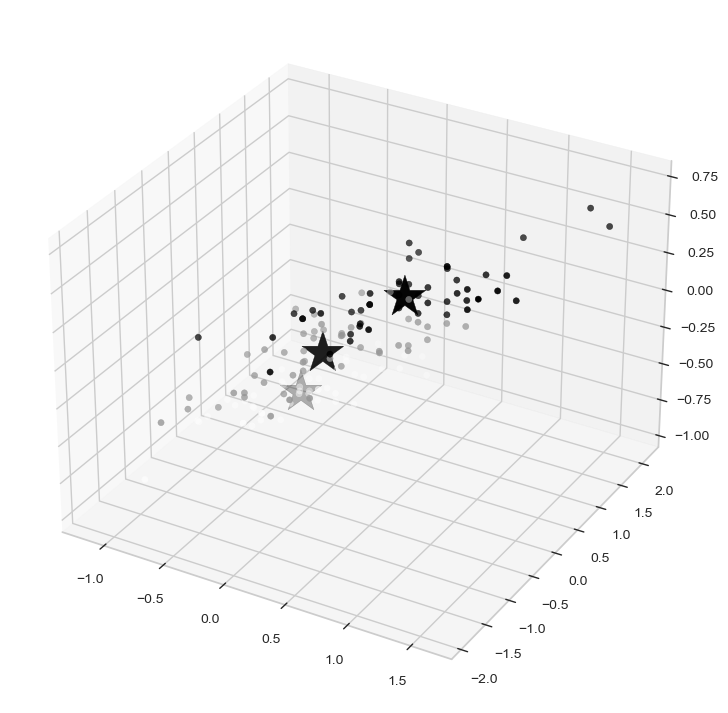

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)
ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

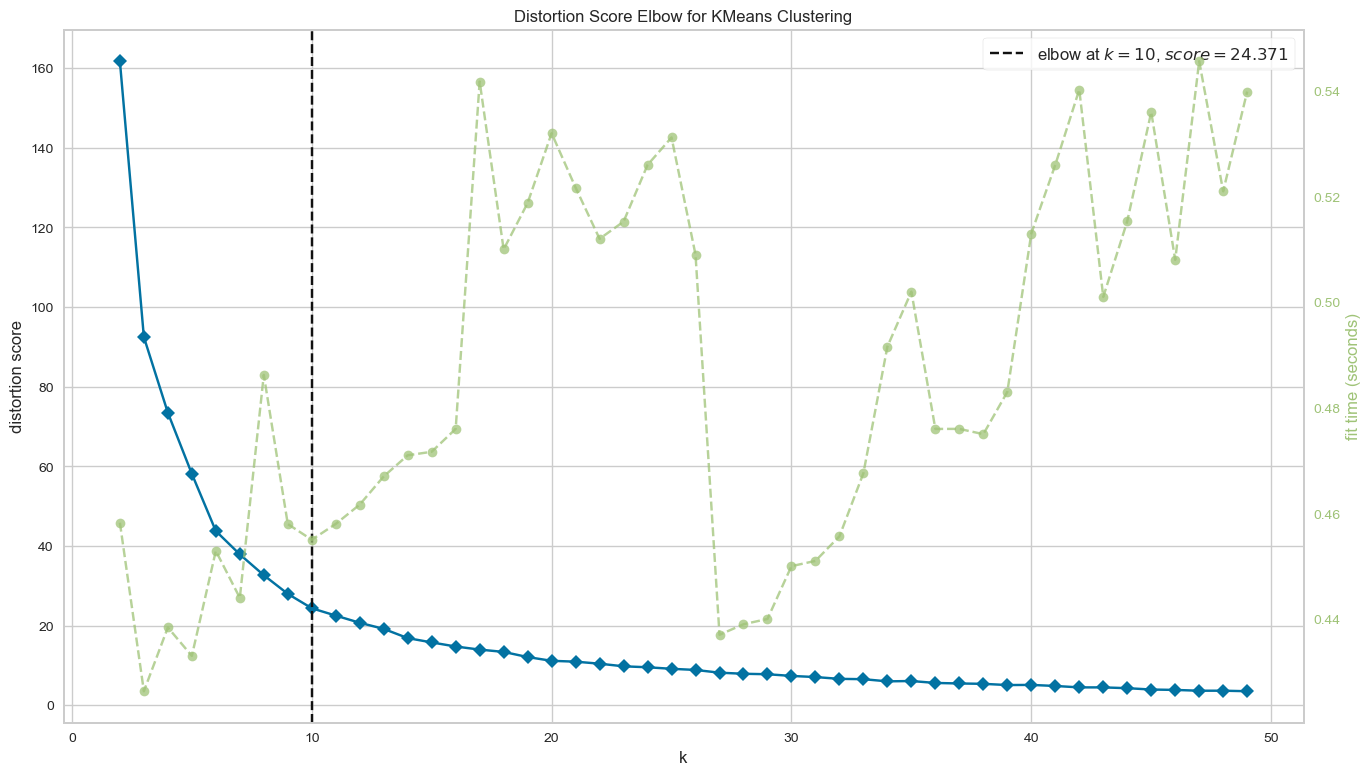

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [116]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

In [117]:
kmeans = KMeans(n_clusters = 10)
k_fit = kmeans.fit(df)
clusters = k_fit.labels_

In [119]:
df2 = pd.DataFrame({ "Clusters":clusters})

In [122]:
df2.index=df.index

In [123]:
df2

,Clusters
1,9
2,4
3,4
4,4
5,9
...,...
146,2
147,0
148,2
149,2


In [125]:
df2.index.name="id"

In [126]:
df2

,Clusters
id,
1,9
2,4
3,4
4,4
5,9
...,...
146,2
147,0
148,2


In [127]:
df2['Clusters']=df2['Clusters']+1

In [128]:
df2

,Clusters
id,
1,10
2,5
3,5
4,5
5,10
...,...
146,3
147,1
148,3


In [129]:
df2.to_excel('iris_clustering.xlsx', index=True)

In [130]:
### Hierarchical Clustering methods

In [131]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

In [132]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',

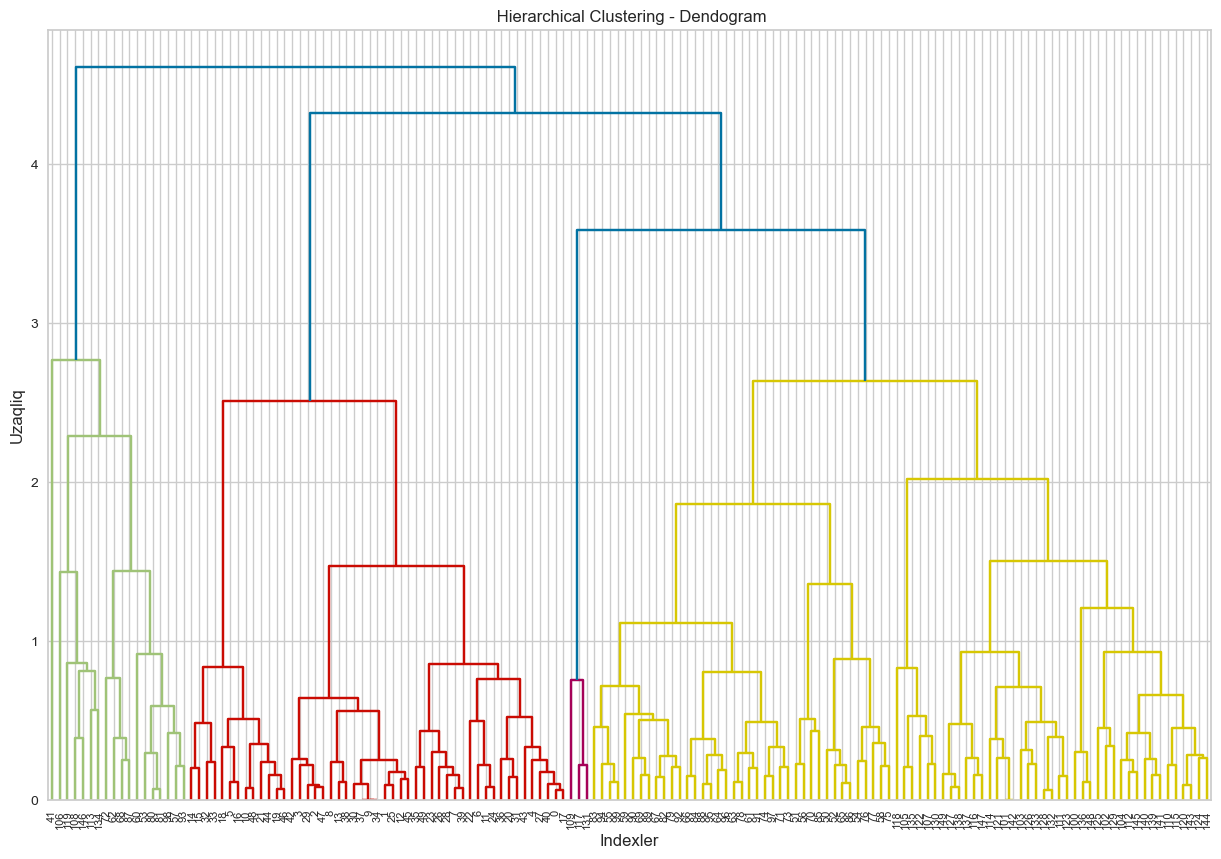

In [138]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title(' Hierarchical Clustering - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaqliq')
dendrogram(
    hc_complete,
    leaf_font_size=8
);

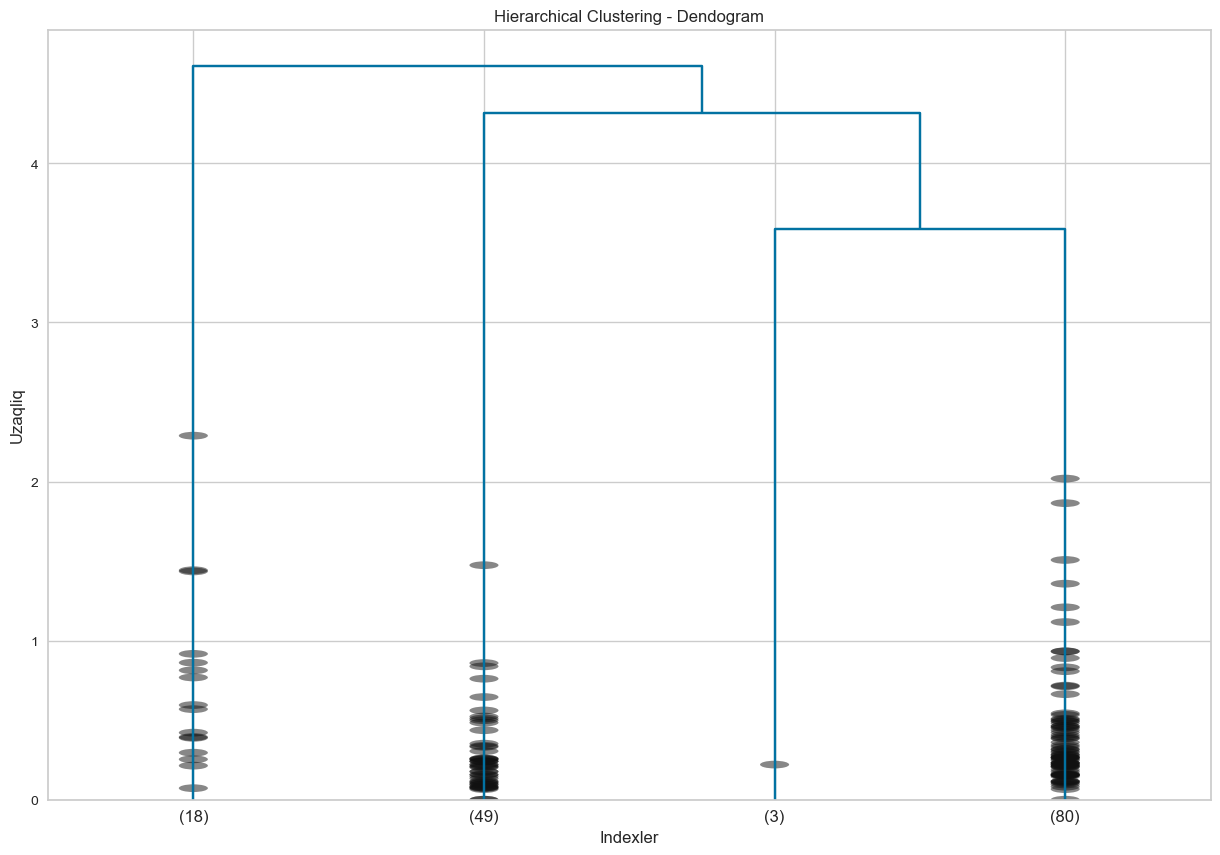

In [139]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaqliq')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

In [142]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1,
       1, 3, 1, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [143]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
id,,,,,,,
1,-0.538462,1.0,-0.842857,-0.733333,1,0,0
2,-0.692308,0.0,-0.842857,-0.733333,1,0,0
3,-0.846154,0.4,-0.871429,-0.733333,1,0,0
4,-0.923077,0.2,-0.814286,-0.733333,1,0,0
5,-0.615385,1.2,-0.842857,-0.733333,1,0,0
...,...,...,...,...,...,...,...
146,0.692308,0.0,0.242857,0.666667,0,0,1
147,0.384615,-1.0,0.185714,0.400000,0,0,1
148,0.538462,0.0,0.242857,0.466667,0,0,1


In [160]:
df3 = pd.DataFrame({ "Clusters": cluster.fit_predict(df)})

In [162]:
df3["Clusters"]=df3["Clusters"]+1
df3.index=df.index

In [164]:
df3.to_excel(" Hierarchical_Clustering_sonuncu.xlsx")

In [163]:
df3

,Clusters
id,
1,2
2,4
3,4
4,4
5,2
...,...
146,1
147,1
148,1
